# Benchmark Notebook

This notebook is used to benchmark the existing pipeline for feature selection using multiple benchmark datasets

In [1]:
from sklearn.datasets import load_breast_cancer

benchmark_breast_cancer_X, benchmark_breast_cancer_y = load_breast_cancer(as_frame=True, return_X_y=True)

benchmark_breast_cancer_X.shape, benchmark_breast_cancer_y.shape

((569, 30), (569,))

In [2]:
from sklearn.datasets import make_regression

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=1000, n_features=1000, n_informative=10, random_state=0)

# turn X and Y into dataframes

import pandas as pd

benchmark_regression_X = pd.DataFrame(benchmark_regression_X)

# turn to pd.series

benchmark_regression_y = pd.Series(benchmark_regression_y)





In [3]:
# turn columns into strings

benchmark_regression_X.columns = [str(i) for i in range(benchmark_regression_X.shape[1])]

benchmark_regression_X.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.084765,1.237148,0.130101,0.154898,-0.676024,-0.081947,0.641238,-0.154788,0.765215,-0.606001,...,-0.870153,1.194708,0.722042,-0.795280,-0.023182,-1.350349,-0.223828,0.510706,2.040819,0.941756
1,0.593602,0.486436,-0.325602,0.153472,-0.685815,0.490864,0.335730,-0.124691,-1.610125,-0.275904,...,-0.731246,-0.768045,0.236065,0.856283,-2.426735,-0.016661,-0.314094,1.894548,-0.800644,0.260231
2,0.506191,-1.735148,-2.781958,0.149985,0.116998,0.963722,-0.651163,-0.050181,0.458096,-0.026627,...,0.563683,-0.342342,-0.789264,0.304380,0.543953,1.375889,0.149494,-0.770951,0.333372,0.292224
3,-0.891875,-0.529014,-2.173289,0.312993,0.244659,-0.342185,0.360855,-1.891031,1.153390,1.866242,...,-0.483675,-0.083471,1.354622,0.565601,0.745887,1.329062,-1.343778,-0.043938,1.039362,1.638842
4,0.757861,0.372349,-1.505053,1.187030,0.158975,-0.384438,0.271868,-1.531922,2.476336,1.560857,...,-0.906083,-2.311178,0.506005,-1.466585,1.776045,-0.406498,0.520906,1.568772,-0.318681,1.505933


In [4]:
benchmark_regression_y.head()

0   -174.503553
1     44.361147
2    -34.902099
3    106.707707
4    -18.504495
dtype: float64

In [2]:
## Import all the models

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

from sklearn.ensemble import BaggingClassifier, BaggingRegressor

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.neural_network import MLPClassifier, MLPRegressor



## Testing sklearn-relief

run `pip install sklearn-relief` to install package

In [1]:
import sklearn_relief as sr
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression

import pandas as pd
import numpy as np 

# make a test dataset

# X, y = make_regression(n_samples=1000, n_features=1000, n_informative=100, random_state=0)

# # turn X and Y into dataframes

# # X = pd.DataFrame(X)
# # y = pd.Series(y)

# # turn columns into strings

# # X.columns = [str(i) for i in range(X.shape[1])]

# # use relieff to select the top 10 features

# selection = sr.RReliefF(n_features=100, n_jobs=1)
# r = selection.fit_transform(X, y)

# print(r)




Relief package hangs forever, possibly due to multiprocessing as a parallel computing backend

## Testing shap package

In [104]:
import shap 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import ElasticNet, ElasticNetCV

from xgboost import XGBRegressor

from sklearn.neural_network import MLPRegressor

import pandas as pd
import numpy as np 

# make a test dataset

X, y = make_regression(n_samples=500, n_features=1000, n_informative=5, random_state=0, shuffle=False)

# turn X and Y into dataframes

X = pd.DataFrame(X)
y = pd.Series(y)

# turn columns into strings

X.columns = [str(i) for i in range(X.shape[1])]


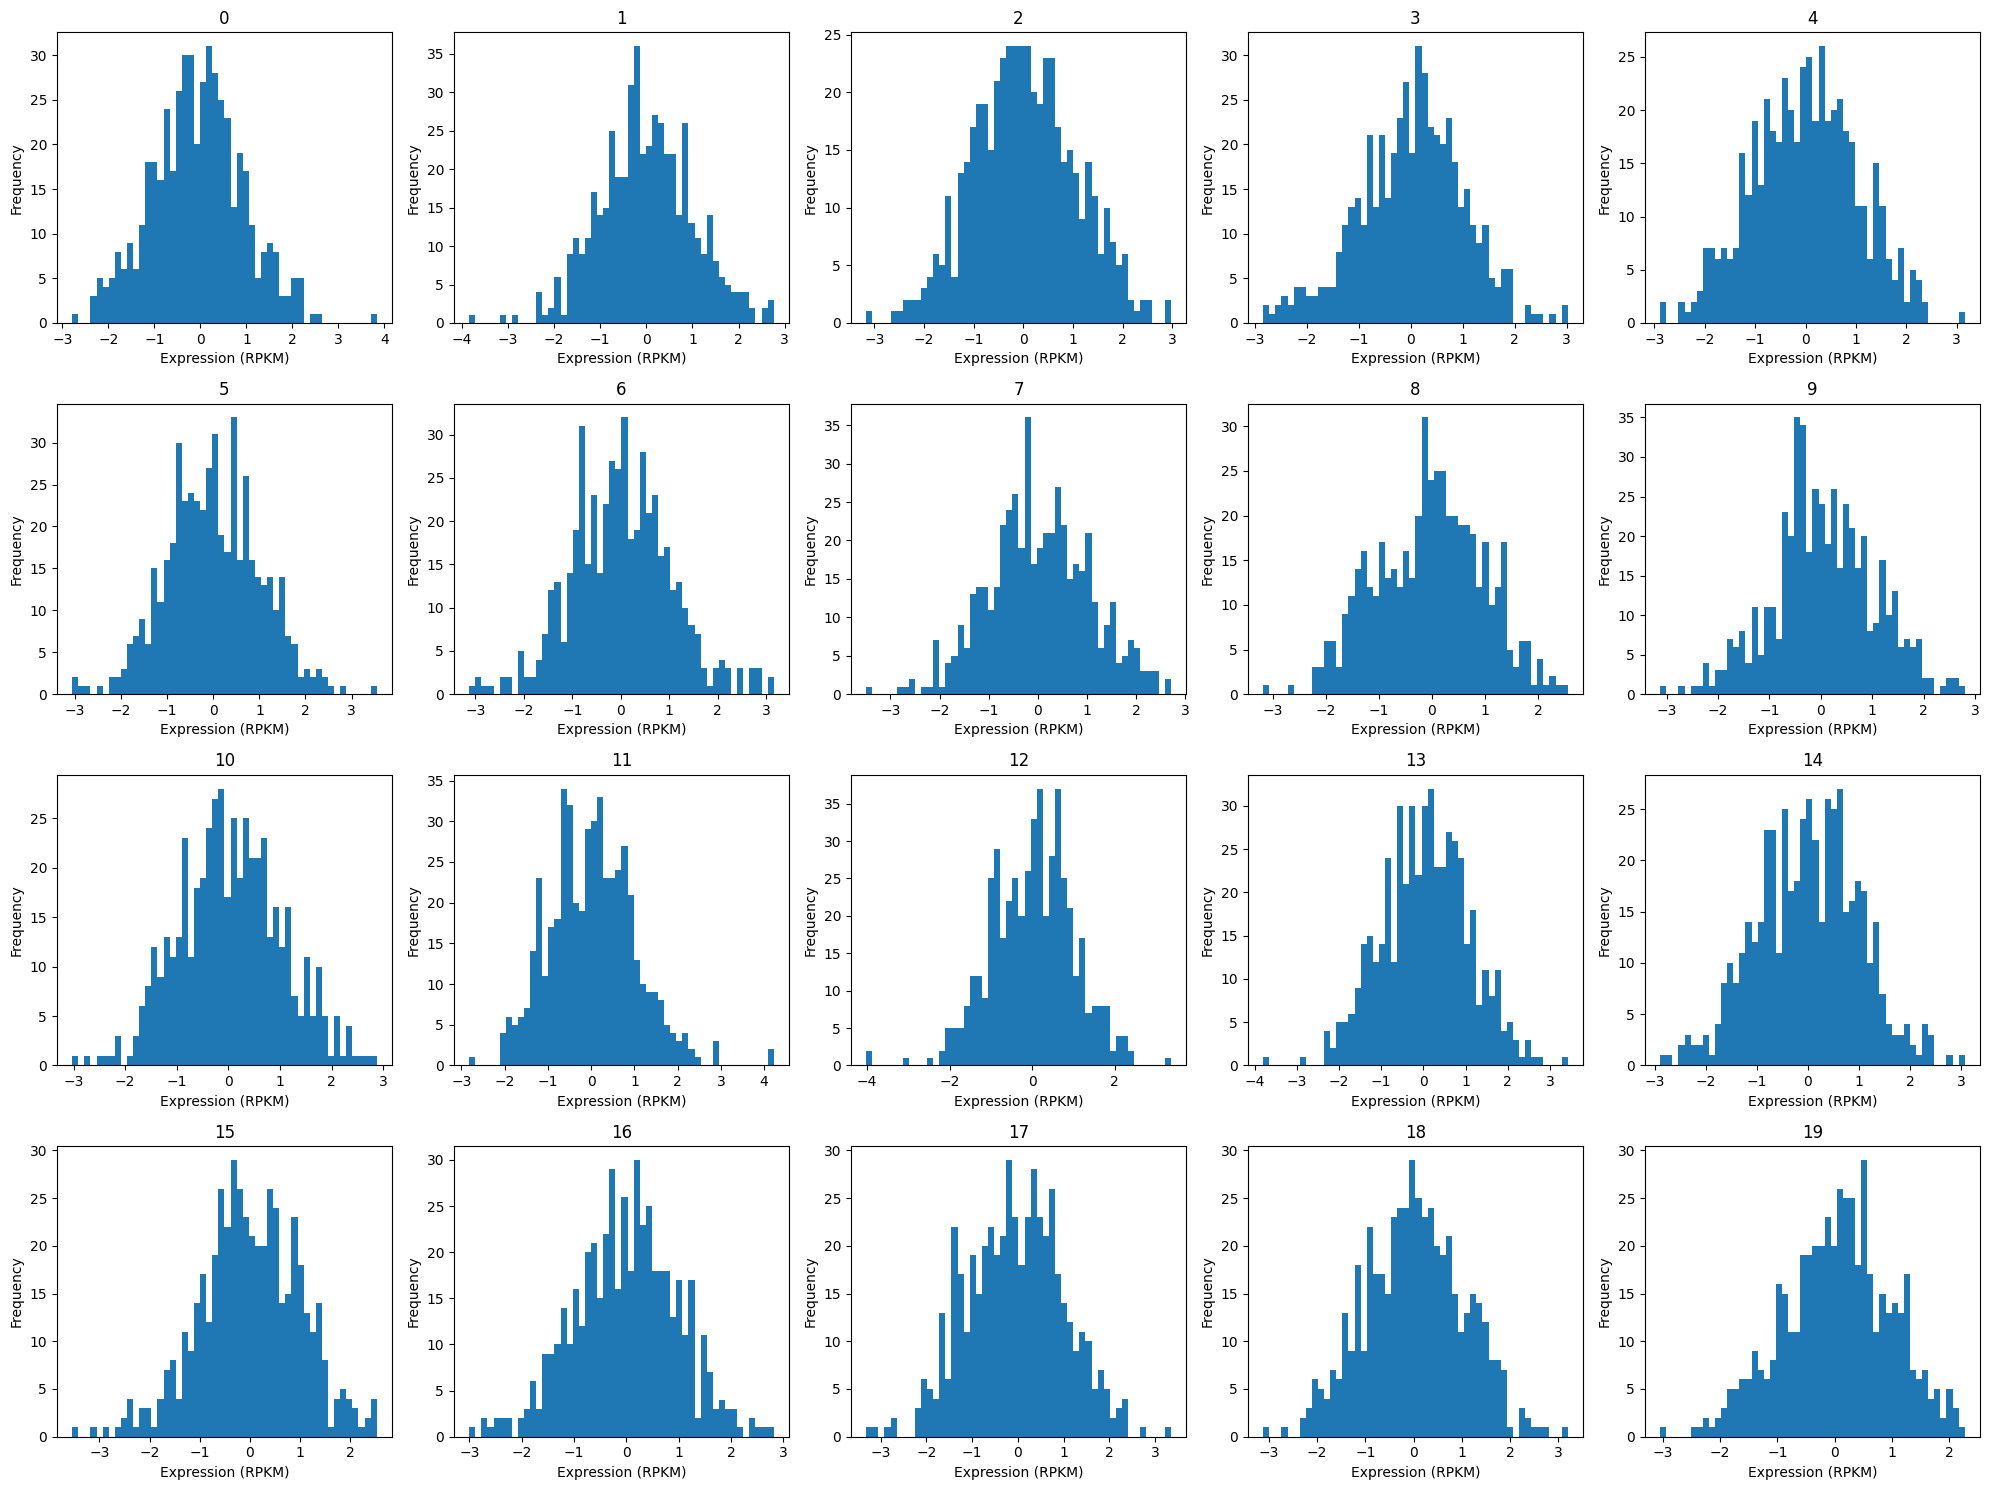

In [105]:
import matplotlib.pyplot as plt

# generate 10 random integers between 0 and len(ccle.columns)
random_cols = np.random.randint(0, len(X.columns), 20)

# a list of integers from 0 to 19
sorted_cols = np.arange(20)

# plot 20 random genes as histograms, 4 rows, 5 columns

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    ax.hist(X.iloc[:, sorted_cols[i]], bins=50)
    ax.set_title(X.columns[sorted_cols[i]])
    ax.set_xlabel('Expression (RPKM)')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


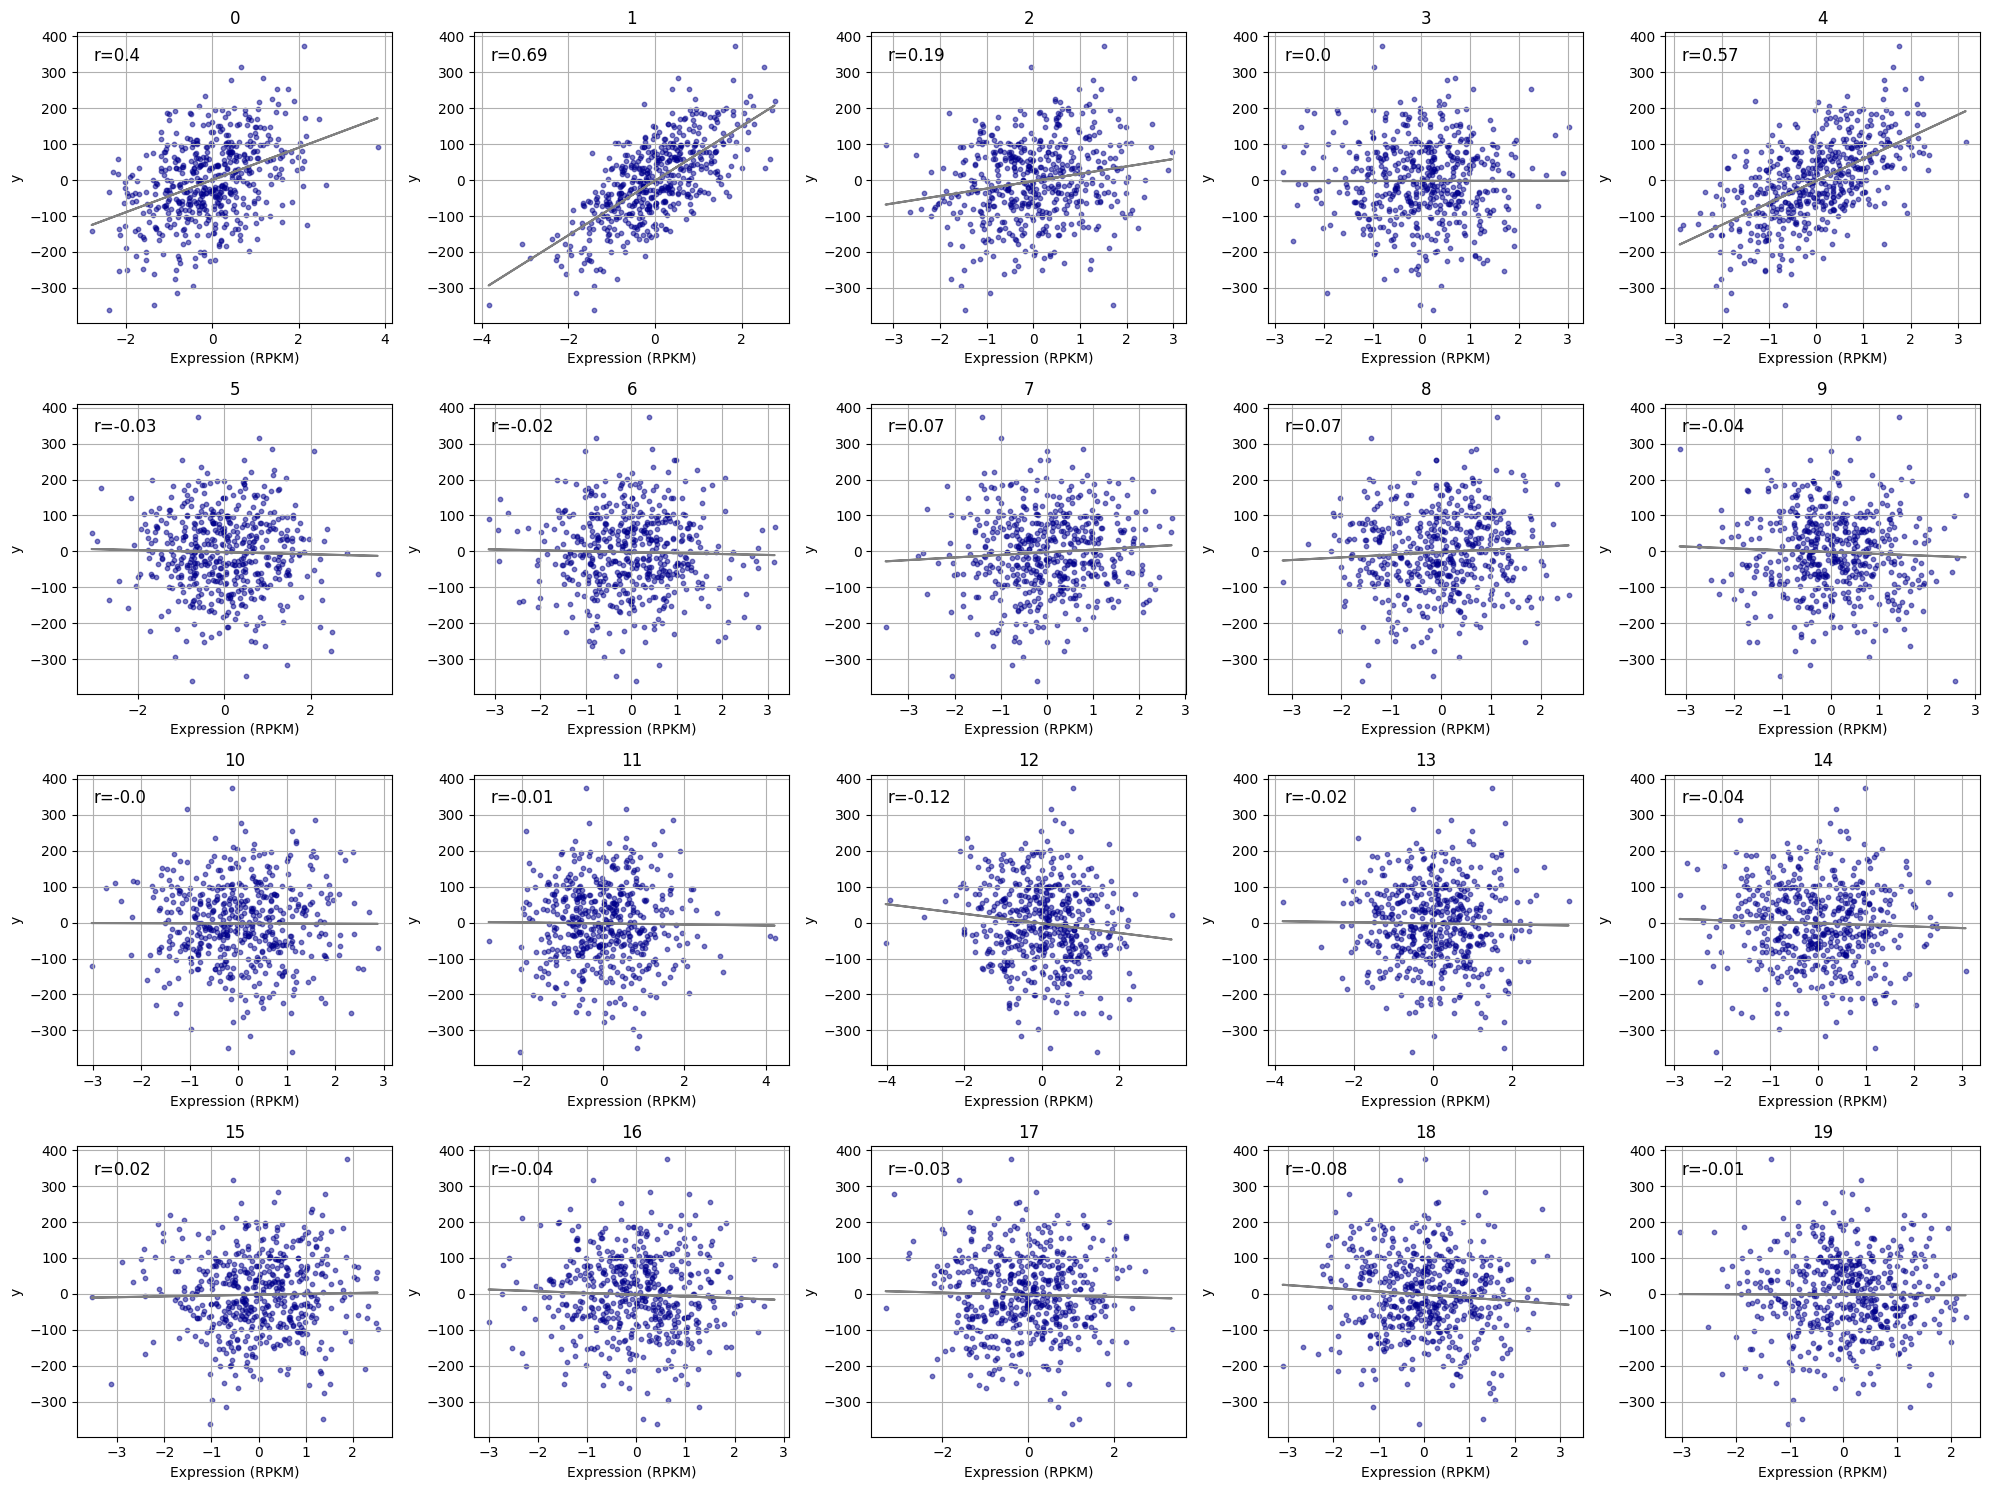

In [106]:
# for 20 random genes, plot correlation between gene expression and drug response

# generate 20 random integers between 0 and len(ccle.columns)
random_cols = np.random.randint(0, len(X.columns), 20)

# a list of integers from 0 to 19
sorted_cols = np.arange(20)

# plot based on above code 

fig, axes = plt.subplots(4, 5, figsize=(20, 15))

for i, ax in enumerate(axes.flatten()):
    gene = X.columns[sorted_cols[i]]
    ax.scatter(X[gene], y, color='darkblue', alpha=0.5, s=10)
    m, b = np.polyfit(X[gene], y, 1)
    ax.plot(X[gene], m*X[gene] + b, color='grey')
    corr = str(round(np.corrcoef(X[gene], y)[0, 1], 2))
    ax.text(0.05, 0.95, f'r={corr}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.set_title(f'{gene}')
    ax.set_xlabel('Expression (RPKM)')
    ax.set_ylabel('y')
    ax.grid()

plt.tight_layout()
plt.show()

In [ ]:

# train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# use a model to fit the data

model = ElasticNet()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print the model score as pearsonr and r2, and mse with 2 significant figures

print("Pearsonr: {:.2f}".format(pearsonr(y_test, y_pred)[0]))
print("R2: {:.2f}".format(r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# plot predictions vs actuals

import Visualisation as v
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(8, 8))

v.plot_predictions_vs_actual_values(y_test, y_pred, title="ElasticNet", x_label="Actual", y_label="Predicted")
plt.show()





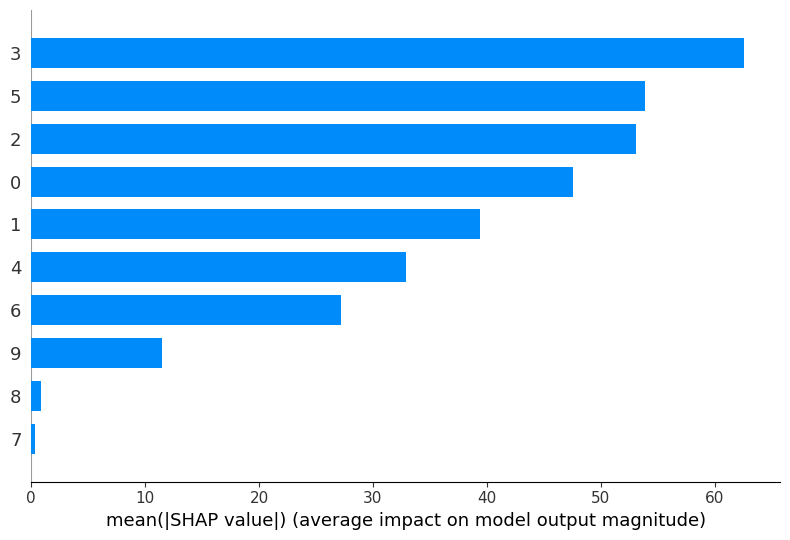

In [76]:
# use shap to explain the model

explainer = shap.LinearExplainer(model, X_train)

shap_values = explainer.shap_values(X_test)

# plot the shap values

shap.summary_plot(shap_values, X_test, plot_type="bar")


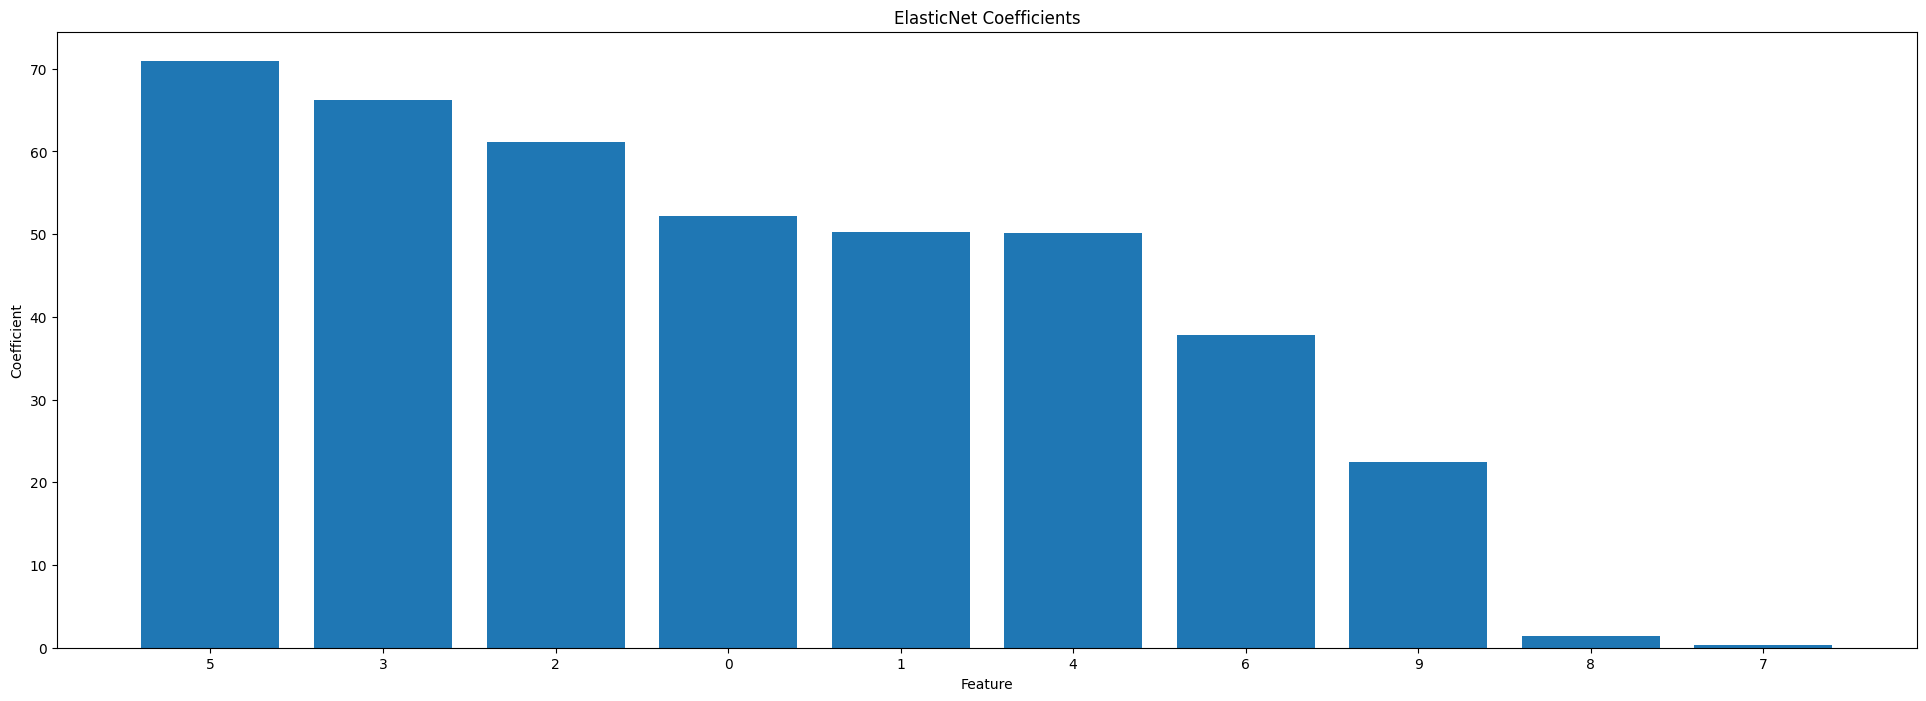

In [77]:
# extract elasticnet coefficients

coef = model.coef_

# plot the coefficients

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(24, 8))

# sort the coefficients with the largest first, along with zipped X.column

sorted_coef = sorted(zip(coef, X.columns), reverse=True)

# extract the coefficients and features

coef, features = zip(*sorted_coef)

# plot the coefficients

number_of_features = 25

plt.bar(features[:number_of_features], coef[:number_of_features])
plt.title("ElasticNet Coefficients")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.show()







## Simple Train Test Split

In [40]:
# perform a simple train test split fitting 

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from sklearn.model_selection import train_test_split

n_samples = 1000
n_features = 1000
n_informative = 10
random_state = 0
model = ElasticNet()

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                 n_features=n_features, 
                                                                 n_informative=n_informative, 
                                                                 random_state=random_state)

# turn X and Y into dataframes
X = pd.DataFrame(benchmark_regression_X)
y = pd.Series(benchmark_regression_y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculate the error

mse = mean_squared_error(y_test, y_pred)

# pearson correlation coefficient and p-value
corr, pval = pearsonr(y_test, y_pred)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')



MSE = 13530.9535, Correlation = 0.8837, p-value = 0.0000


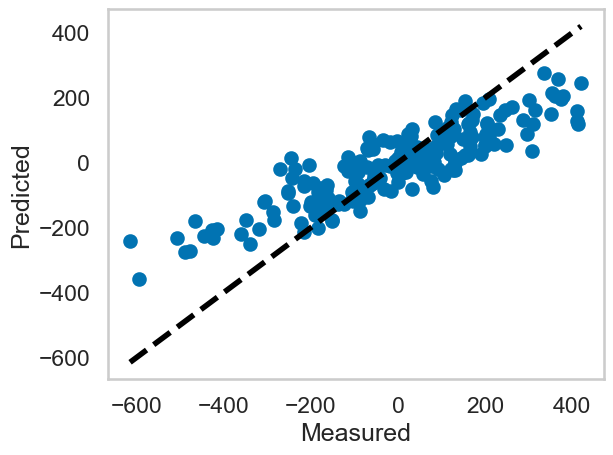

In [41]:
## plot y_test vs y_pred

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
# plot a line y=x

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.grid()
plt.show()

## Making a function

In [3]:
# perform a simple train test split fitting 

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from sklearn.model_selection import train_test_split

n_samples = 1000
n_features = 1000
n_informative = 10
random_state = 0
model = ElasticNet()


def evaluate_make_regression(model, n_samples=1000, n_features=1000, n_informative=10, random_state=0):

    benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                    n_features=n_features, 
                                                                    n_informative=n_informative, 
                                                                    random_state=random_state)

    # turn X and Y into dataframes
    X = pd.DataFrame(benchmark_regression_X)
    y = pd.Series(benchmark_regression_y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # calculate the error

    mse = mean_squared_error(y_test, y_pred)

    # pearson correlation coefficient and p-value
    corr, pval = pearsonr(y_test, y_pred)

    # print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

    return mse, corr, pval, y_test, y_pred

## plot y_test vs y_pred

import matplotlib.pyplot as plt


def plot_make_regression(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    # plot a line y=x

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()

## Benchmarking (1000, 10000, 10)

MSE = 35499.4834, Correlation = 0.5530, p-value = 0.0000


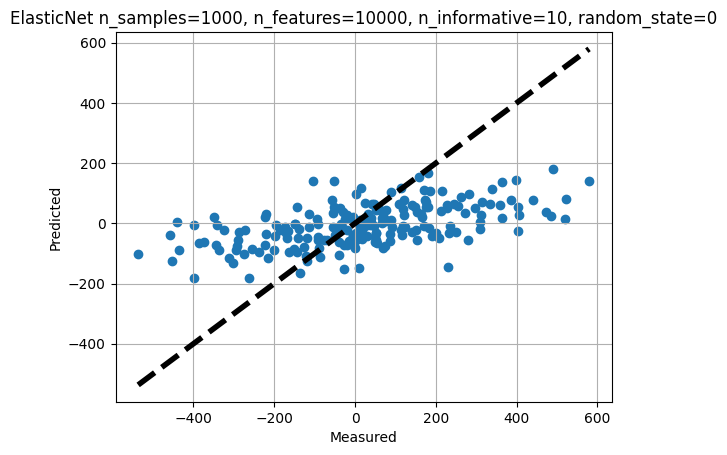

In [15]:
n_samples = 1000
n_features = 10000
n_informative = 10
random_state = 0
model = ElasticNet()

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=0)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Even smaller sample size

MSE = 49591.6623, Correlation = 0.1404, p-value = 0.5548


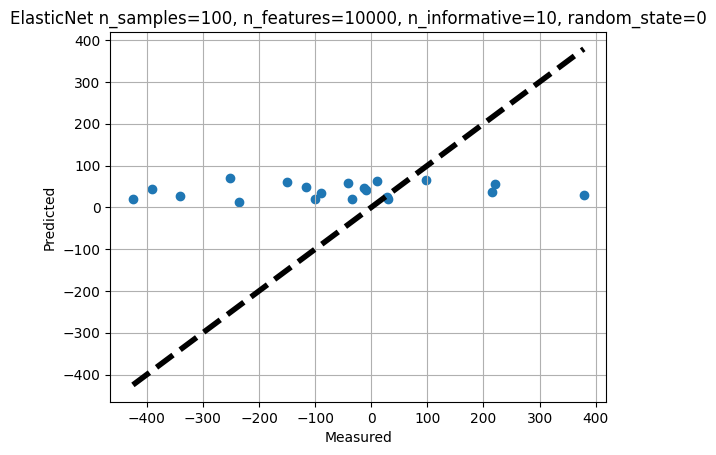

In [17]:
n_samples = 100
n_features = 10000
n_informative = 10
random_state = 0
model = ElasticNet(max_iter=10000)

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=0)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Using f-regression feature selection

MSE = 37948.0801, Correlation = 0.4636, p-value = 0.0000


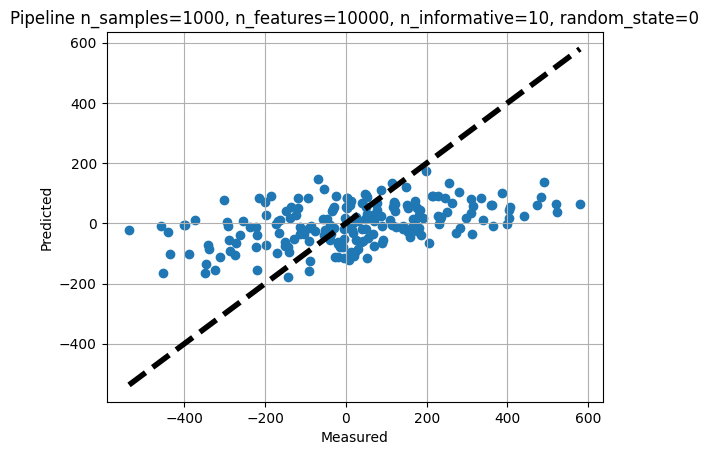

In [25]:
n_samples = 1000
n_features = 10000
n_informative = 10
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

# create a pipeline

model = Pipeline([('scaler', StandardScaler()),
                    ('select', SelectKBest(f_regression, k=1)),
                    ('model', ElasticNet(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=0)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Effect of feature size on performance

In [39]:
n_samples = 1000
n_features = 10000
n_informative = 10
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

import pandas as pd

# create a pipeline

iterations = 3
collection_df = pd.DataFrame(columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])
k_range_large = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000] 
k_range_small = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

selected_k_range = k_range_large
total_iterations = iterations * len(selected_k_range)

iter_count = 0 
for i in range(iterations):
    for k in selected_k_range:
        model = Pipeline([('scaler', StandardScaler()),
                        ('select', SelectKBest(f_regression, k=k)),
                        ('model', ElasticNet(max_iter=10000))])

        mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                                n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=0+i)

        # use pd.concat to append a new row to the dataframe
        collection_df = pd.concat([collection_df, pd.DataFrame([[i, k, mse, corr, pval, y_test, y_pred]], columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])], ignore_index=True)

        # print progress
        print(f'{iter_count}/{total_iterations} - {model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}, k={k}')

        iter_count += 1






0/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=1
1/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=2
2/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=3
3/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=4
4/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=5
5/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=10
6/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=20
7/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=30
8/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=40
9/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=50
10/60 - Pipeline n_samples=1000, n_features=10000, n_informative=10, random_state=0, k=60
11/60 - Pipeline n_sample

In [40]:
collection_df

,i,k,MSE,Correlation,p-value,y_test,y_pred
0,0,1,37948.080079,0.463563,4.758153e-12,993 175.550290 859 334.193803 298 3...,"[-24.082869302549916, 84.42037900181131, 49.84..."
1,0,2,32713.209335,0.591954,2.680057e-20,993 175.550290 859 334.193803 298 3...,"[-44.82188787280437, 81.10899903249437, 61.646..."
2,0,3,26286.122371,0.724528,7.746108e-34,993 175.550290 859 334.193803 298 3...,"[-18.00416551352174, 122.15601106072016, 60.24..."
3,0,4,20010.614843,0.817568,2.387741e-49,993 175.550290 859 334.193803 298 3...,"[56.422755247228416, 189.47894631235127, 78.30..."
4,0,5,14157.379060,0.895516,1.518087e-71,993 175.550290 859 334.193803 298 3...,"[87.25828053850208, 119.42435080051028, 20.513..."
5,0,10,6140.748783,0.990550,8.407369e-173,993 175.550290 859 334.193803 298 3...,"[133.0493904412216, 217.0881260588555, 17.7192..."
6,0,20,6588.350501,0.986929,6.226970e-159,993 175.550290 859 334.193803 298 3...,"[144.59037757689185, 211.51878488636476, 13.46..."
7,0,30,6975.032406,0.980221,2.886092e-141,993 175.550290 859 334.193803 298 3...,"[137.2422099639544, 187.54688528125843, 48.646..."
8,0,40,7611.225293,0.975004,2.601232e-131,993 175.550290 859 334.193803 298 3...,"[128.15994107770035, 183.11243775943043, 37.72..."
9,0,50,8246.507671,0.970887,7.614812e-125,993 175.550290 859 334.193803 298 3...,"[126.72783207461013, 163.5183114325671, 32.159..."


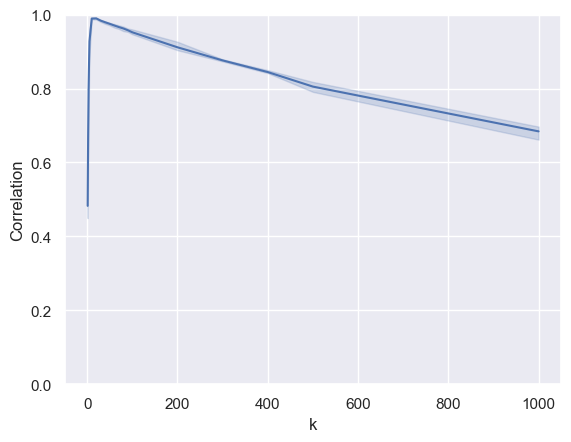

In [41]:
# use seaborn to plot collection_df over k 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# set y-axis to start from 0 
plt.ylim(0, 1)
sns.lineplot(x='k', y='Correlation', data=collection_df)
plt.show()


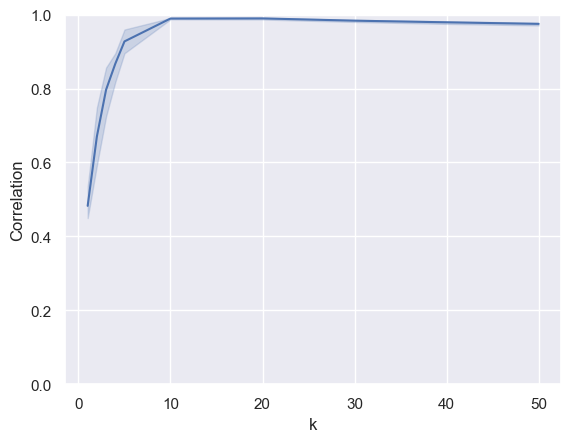

In [43]:
# plot k up to 50 as a close up 
sns.set_theme(style="darkgrid")

# set y-axis to start from 0
plt.ylim(0, 1)

sns.lineplot(x='k', y='Correlation', data=collection_df[collection_df['k'] <= 50])

plt.show()

## Increasing informative features

In [44]:
n_samples = 1000
n_features = 10000
n_informative = 100
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

import pandas as pd

# create a pipeline

iterations = 3
collection_df = pd.DataFrame(columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])
k_range_large = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000] 
k_range_small = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

selected_k_range = k_range_large
total_iterations = iterations * len(selected_k_range)

iter_count = 0 
for i in range(iterations):
    for k in selected_k_range:
        model = Pipeline([('scaler', StandardScaler()),
                        ('select', SelectKBest(f_regression, k=k)),
                        ('model', ElasticNet(max_iter=10000))])

        mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                                n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=0+i)

        # use pd.concat to append a new row to the dataframe
        collection_df = pd.concat([collection_df, pd.DataFrame([[i, k, mse, corr, pval, y_test, y_pred]], columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])], ignore_index=True)

        # print progress
        print(f'{iter_count}/{total_iterations} - {model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}, k={k}')

        iter_count += 1






0/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=1
1/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=2
2/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=3
3/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=4
4/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=5
5/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=10
6/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=20
7/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=30
8/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=40
9/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=50
10/60 - Pipeline n_samples=1000, n_features=10000, n_informative=100, random_state=0, k=60
11/60 - Pipeli

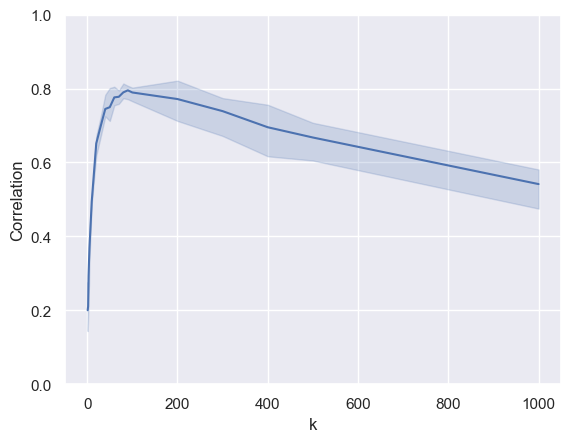

In [46]:
# use seaborn to plot collection_df over k 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# set y-axis to start from 0 
plt.ylim(0, 1)
sns.lineplot(x='k', y='Correlation', data=collection_df)
plt.show()


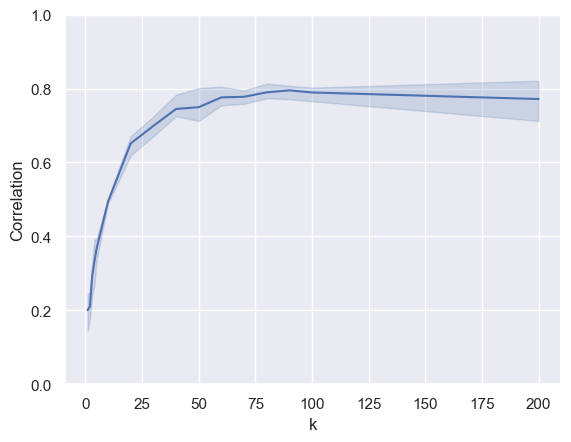

In [47]:
# plot k up to 50 as a close up 
sns.set_theme(style="darkgrid")

# set y-axis to start from 0
plt.ylim(0, 1)

sns.lineplot(x='k', y='Correlation', data=collection_df[collection_df['k'] <= 200])

plt.show()

## Reducing sample size

In [54]:
n_samples = 100
n_features = 10000
n_informative = 100
random_state = 0
# import pipeline, scaler and f-regression, select k best 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest

import pandas as pd

# create a pipeline

iterations = 3
collection_df = pd.DataFrame(columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])
k_range_large = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1000] 
k_range_small = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

selected_k_range = k_range_large
total_iterations = iterations * len(selected_k_range)

iter_count = 0 
for i in range(iterations):
    for k in selected_k_range:
        model = Pipeline([('scaler', StandardScaler()),
                        ('select', SelectKBest(f_regression, k=k)),
                        ('model', ElasticNet(max_iter=10000))])

        mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                                n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=0+i)

        # use pd.concat to append a new row to the dataframe
        collection_df = pd.concat([collection_df, pd.DataFrame([[i, k, mse, corr, pval, y_test, y_pred]], columns=['i', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred'])], ignore_index=True)

        # print progress
        print(f'{iter_count}/{total_iterations} - {model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}, k={k}')

        iter_count += 1






0/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=1
1/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=2
2/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=3
3/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=4
4/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=5
5/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=10
6/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=20
7/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=30
8/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=40
9/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=50
10/60 - Pipeline n_samples=100, n_features=10000, n_informative=100, random_state=0, k=60
11/60 - Pipeline n_sample

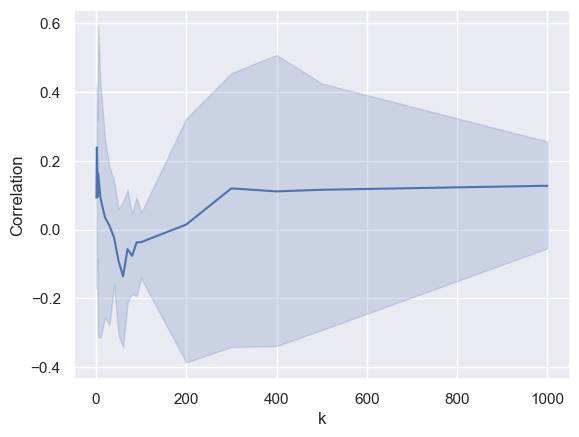

In [58]:
# use seaborn to plot collection_df over k 

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# set y-axis to start from 0 
# plt.ylim(0, 1)
sns.lineplot(x='k', y='Correlation', data=collection_df)
plt.show()


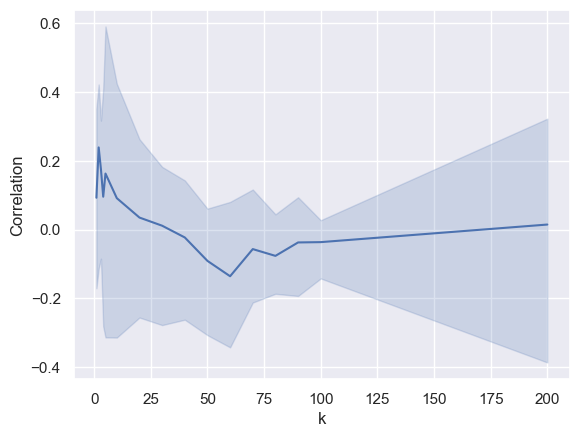

In [59]:
# plot k up to 50 as a close up 
sns.set_theme(style="darkgrid")

# set y-axis to start from 0
# plt.ylim(0, 1)

sns.lineplot(x='k', y='Correlation', data=collection_df[collection_df['k'] <= 200])

plt.show()

Failed fit!

## Using more powerful models

MSE = 1165.3036, Correlation = 0.9910, p-value = 0.0000


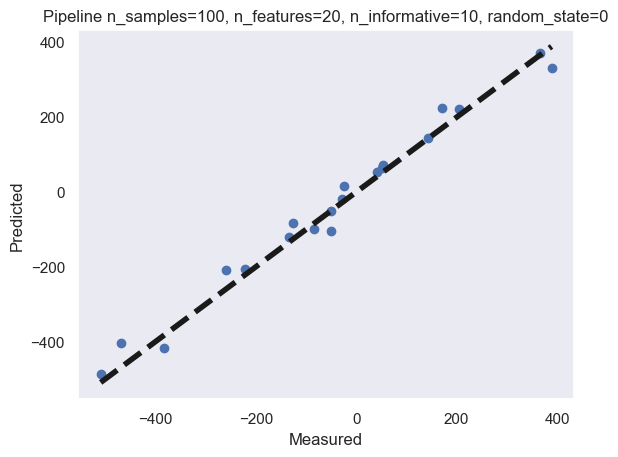

In [131]:
import dynmarker.FeatureSelection as fs 
from functools import partial

# import mutual information regression
from sklearn.feature_selection import mutual_info_regression


n_samples = 100
n_features = 20
n_informative = 10
random_state = 0
k = 10
mrmr_score_func = partial(fs.mrmr_select_fcq_sklearn, K=k)
model = Pipeline([('scaler', StandardScaler()),
                ('select', SelectKBest(f_regression, k=k)),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=15)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

MSE = 238204.4990, Correlation = 0.5420, p-value = 0.0136


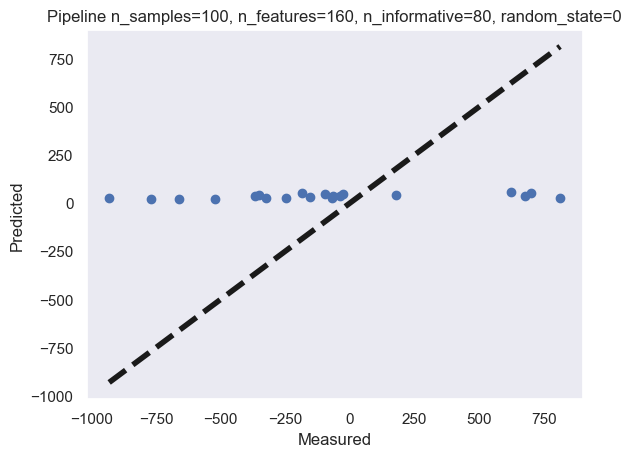

In [167]:
import dynmarker.FeatureSelection as fs 
from functools import partial

# import mutual information regression
from sklearn.feature_selection import mutual_info_regression


n_samples = 100
n_features = 160
n_informative = int(n_features/2)
random_state = 0
k = int(n_features/4)
mrmr_score_func = partial(fs.mrmr_select_fcq_sklearn, K=k)
model = Pipeline([('scaler', StandardScaler()),
                ('select', SelectKBest(mutual_info_regression, k=k)),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, 
                                                           n_samples=n_samples, 
                                                           n_features=n_features, 
                                                           n_informative=n_informative, 
                                                           random_state=15)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

plt.title(f'{model.__class__.__name__} n_samples={n_samples}, n_features={n_features}, n_informative={n_informative}, random_state={random_state}')
plot_make_regression(y_test, y_pred)

## Extract ground truth features from make_regression

In [192]:
n_samples = 100
n_features = 10000
n_informative = 50
random_state = 15
k = 50
model = Pipeline([('scaler', StandardScaler()),
                ('model', LassoCV(max_iter=10000))])

benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=random_state, 
                                                                shuffle=False)

# turn X and Y into dataframes
X = pd.DataFrame(benchmark_regression_X)
y = pd.Series(benchmark_regression_y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# select the first k features in X_train

X_train = X_train.iloc[:, :k]

model.fit(X_train, y_train)

y_pred = model.predict(X_test.iloc[:, :k])

# calculate the error

mse = mean_squared_error(y_test, y_pred)

# pearson correlation coefficient and p-value
corr, pval = pearsonr(y_test, y_pred)

print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

MSE = 48.8096, Correlation = 1.0000, p-value = 0.0000


# Conclusions

## Synthetic Datasets can be used to demonstrate curse of dimensionality

## Information is hard to extract when sample size is small

In [16]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

def ground_truth_evaluation(model, n_samples=1000, n_features=1000, n_informative=10, k_features=10, random_state=0, verbose=False):
    
    benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                n_features=n_features, 
                                                                n_informative=n_informative, 
                                                                random_state=random_state, 
                                                                shuffle=False)

    # turn X and Y into dataframes
    X = pd.DataFrame(benchmark_regression_X)
    y = pd.Series(benchmark_regression_y)

    k = k_features


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # select the first k features in X_train

    X_train = X_train.iloc[:, :k]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test.iloc[:, :k])

    # calculate the error

    mse = mean_squared_error(y_test, y_pred)

    # pearson correlation coefficient and p-value
    corr, pval = pearsonr(y_test, y_pred)

    if verbose:
        # print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')
        # print the parameters and the model name, and the results
        print(f'{model.__class__.__name__} n={n_samples}, kt={n_features}, inf={n_informative}, MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

    return mse, corr, pval, y_test, y_pred

# perform a simple train test split fitting 

from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split


def evaluate_make_regression(model, n_samples=1000, n_features=1000, n_informative=10, random_state=0):

    benchmark_regression_X, benchmark_regression_y = make_regression(n_samples=n_samples, 
                                                                    n_features=n_features, 
                                                                    n_informative=n_informative, 
                                                                    random_state=random_state)

    # turn X and Y into dataframes
    X = pd.DataFrame(benchmark_regression_X)
    y = pd.Series(benchmark_regression_y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # calculate the error

    mse = mean_squared_error(y_test, y_pred)

    # pearson correlation coefficient and p-value
    corr, pval = pearsonr(y_test, y_pred)

    # print(f'MSE = {mse:.4f}, Correlation = {corr:.4f}, p-value = {pval:.4f}')

    return mse, corr, pval, y_test, y_pred

## plot y_test vs y_pred

import matplotlib.pyplot as plt


def plot_make_regression(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    # plot a line y=x

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()


In [17]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


model = Pipeline([('scaler', StandardScaler()),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = ground_truth_evaluation(model, n_samples=100, n_features=10000, n_informative=10, k_features=10,random_state=0, verbose=True)

Pipeline n=100, k=10000, inf=10, MSE = 0.1499, Correlation = 1.0000, p-value = 0.0000


In [26]:
columns = ['i', 'sample_size', 'k', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred']
collection_df = pd.DataFrame(columns=columns)
n_samples = [100, 1000, 10000]
n_features = 10000 
n_informative = [10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
repeats = 3

for s in n_samples:
    for inf in n_informative:
        for i in range(repeats):

            mse, corr, pval, y_test, y_pred = ground_truth_evaluation(model, n_samples=s, n_features=n_features, n_informative=inf, k_features=inf,random_state=i, verbose=False)
            if corr == np.nan:
                print(f'WARNING: corr is nan at i={i}, inf={inf}')
                corr = 0
            if pval == np.nan:
                pval = 10
            collection_df = pd.concat([collection_df, pd.DataFrame([[i, s, inf, mse, corr, pval, y_test, y_pred]], columns=columns)], ignore_index=True)
collection_df.head()

c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\scipy\stats\_stats_py.py:4464: NearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(stats.NearConstantInputWarning(msg))
c:\Github\ode-bio

,i,sample_size,k,MSE,Correlation,p-value,y_test,y_pred
0,0,100,10,0.149894,1.000000,2.775203e-58,26 -18.504495 86 -340.949110 2 -41.10...,"[-18.260134364270865, -340.1625782503299, -41...."
1,1,100,10,0.146253,0.999999,2.128420e-51,80 -84.754749 84 236.585585 33 -216.75...,"[-84.59017802472124, 236.42576726572236, -216...."
2,2,100,10,0.143752,0.999999,1.037421e-53,83 29.994055 30 -56.223466 56 -138.48...,"[29.726137694233728, -56.06235551821004, -138...."
3,0,100,20,0.447975,0.999999,2.951619e-54,26 250.141421 86 -282.017334 2 15.54...,"[250.24209733581904, -281.3885495405211, 15.71..."
4,1,100,20,0.242075,0.999999,6.630062e-53,80 -79.715380 84 328.309294 33 -165.87...,"[-79.77998828469308, 328.0893747698875, -165.7..."


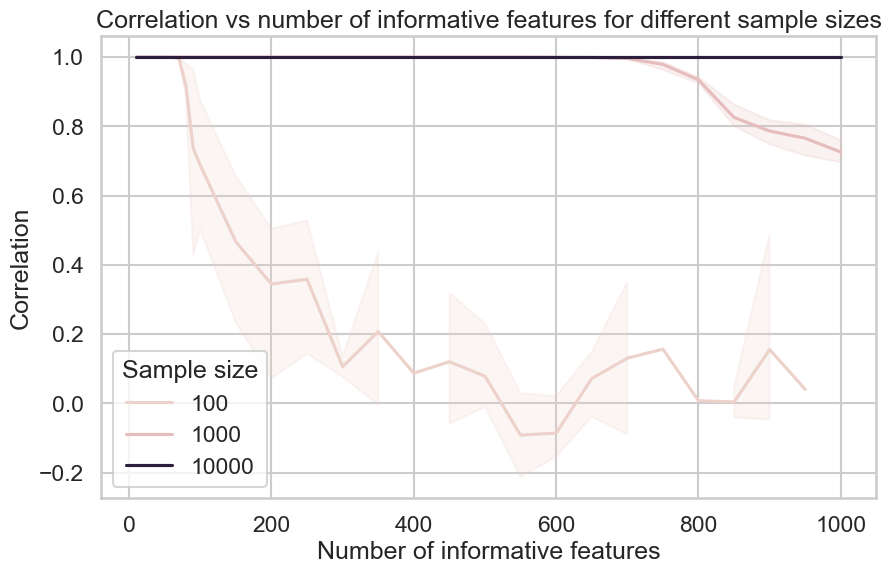

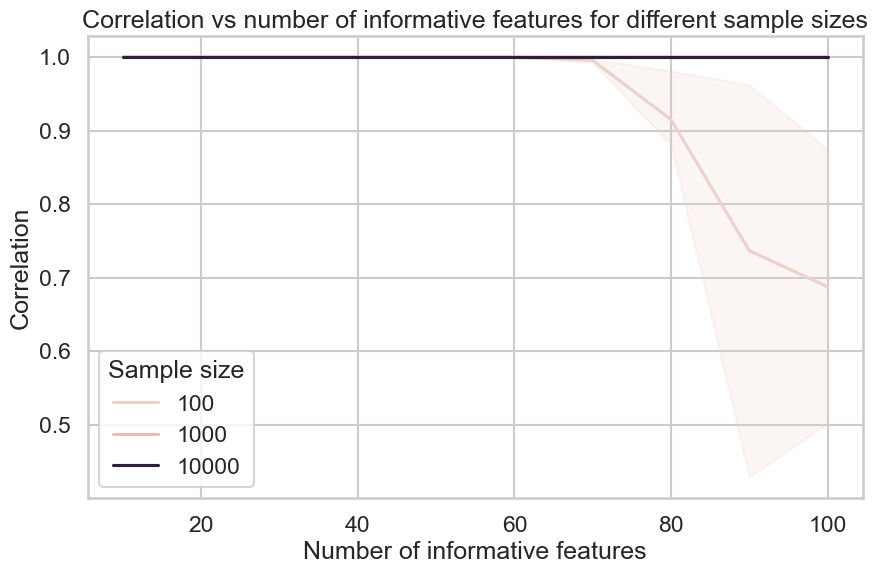

In [35]:
# using seaborn to plot the results, correlation vs number of informative features for different sample sizes

sns.set_style('whitegrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot(x='k', y='Correlation', hue='sample_size', data=collection_df, ax=ax)
ax.set_title('Correlation vs number of informative features for different sample sizes')
ax.set_xlabel('Number of informative features')
ax.set_ylabel('Correlation')
ax.legend(title='Sample size')
plt.show()

# in the second plot, we restrict the number of informative features to 100

sns.set_style('whitegrid')
sns.set_palette('colorblind')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.lineplot(x='k', y='Correlation', hue='sample_size', data=collection_df[collection_df['k']<=100], ax=ax)
ax.set_title('Correlation vs number of informative features for different sample sizes')
ax.set_xlabel('Number of informative features')
ax.set_ylabel('Correlation')
ax.legend(title='Sample size')
plt.show()

In [37]:
# save the results to a pickle file

collection_df.to_pickle('data/processed-results/ground_truth_results.pkl')

In [4]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# import feature selection 
from sklearn.feature_selection import SelectKBest, f_regression


model = Pipeline([('scaler', StandardScaler()),
                ('model', LassoCV(max_iter=10000))])

mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, n_samples=100, n_features=10000, n_informative=10,random_state=0)

In [5]:
columns = ['i', 'sample_size', 'k', 'inf', 'MSE', 'Correlation', 'p-value', 'y_test', 'y_pred']
collection_df = pd.DataFrame(columns=columns)
n_samples = [100, 1000, 10000]
n_features = 10000
n_informative = [10,100,1000]
k_range_small = [10,50,100]
repeats = 10



count = 0
total_iterations = len(n_samples)*len(n_informative)*len(k_range_small)*repeats
for s in n_samples:
    for inf in n_informative:
        for k in k_range_small:
            for i in range(repeats):
                model = Pipeline([('scaler', StandardScaler()),
                                  ('feature_selection', SelectKBest(f_regression, k=k)),
                                ('model', LassoCV(max_iter=10000))])
                mse, corr, pval, y_test, y_pred = evaluate_make_regression(model, n_samples=s, n_features=n_features, n_informative=inf,random_state=i)
                if corr == np.nan:
                    print(f'WARNING: corr is nan at k={k}, inf={inf}')
                    corr = 0
                if pval == np.nan:
                    pval = 10
                collection_df = pd.concat([collection_df, pd.DataFrame([[i, s, k, inf, mse, corr, pval, y_test, y_pred]], columns=columns)], ignore_index=True)
                count += 1
                print(f'{count}/{total_iterations} iterations completed, {count/total_iterations*100:.2f}%. Current k={k}, inf={inf}, s={s}, i={i}')

collection_df.head()

1/270 iterations completed, 0.37%. Current k=10, inf=10, s=100, i=0
2/270 iterations completed, 0.74%. Current k=10, inf=10, s=100, i=1
3/270 iterations completed, 1.11%. Current k=10, inf=10, s=100, i=2
4/270 iterations completed, 1.48%. Current k=10, inf=10, s=100, i=3
5/270 iterations completed, 1.85%. Current k=10, inf=10, s=100, i=4
6/270 iterations completed, 2.22%. Current k=10, inf=10, s=100, i=5
7/270 iterations completed, 2.59%. Current k=10, inf=10, s=100, i=6
8/270 iterations completed, 2.96%. Current k=10, inf=10, s=100, i=7
9/270 iterations completed, 3.33%. Current k=10, inf=10, s=100, i=8
10/270 iterations completed, 3.70%. Current k=10, inf=10, s=100, i=9
11/270 iterations completed, 4.07%. Current k=50, inf=10, s=100, i=0
12/270 iterations completed, 4.44%. Current k=50, inf=10, s=100, i=1
13/270 iterations completed, 4.81%. Current k=50, inf=10, s=100, i=2
14/270 iterations completed, 5.19%. Current k=50, inf=10, s=100, i=3
15/270 iterations completed, 5.56%. Current

,i,sample_size,k,inf,MSE,Correlation,p-value,y_test,y_pred
0,0,100,10,10,37357.657150,0.455438,4.359782e-02,26 27.221927 86 -41.101660 2 -100.37...,"[12.423408396494626, 61.08364705108735, -164.0..."
1,1,100,10,10,19026.806273,0.781900,4.656282e-05,80 -205.494227 84 -15.009789 33 -12.70...,"[-76.35696722143754, 50.37543841848698, -22.41..."
2,2,100,10,10,6913.403726,0.887872,1.759665e-07,83 -75.631349 30 136.302553 56 29.99...,"[-82.0039769929108, 128.54686538948175, -4.294..."
3,3,100,10,10,9812.273540,0.862305,1.014164e-06,93 149.721947 67 43.777763 6 -203.70...,"[-51.197080767290686, 26.622985183101044, -235..."
4,4,100,10,10,10083.087082,0.902874,5.111505e-08,20 -18.181037 10 160.858012 96 -300.79...,"[24.758265366532363, 62.02065592337365, -123.0..."


In [ ]:
# save df to pickle

collection_df.to_pickle('data/processed-results/f_reg_selection_results_make_regression.pkl')

In [2]:
# load pickle file

import pandas as pd

collection_df = pd.read_pickle('data/processed-results/f_reg_selection_results_make_regression.pkl')

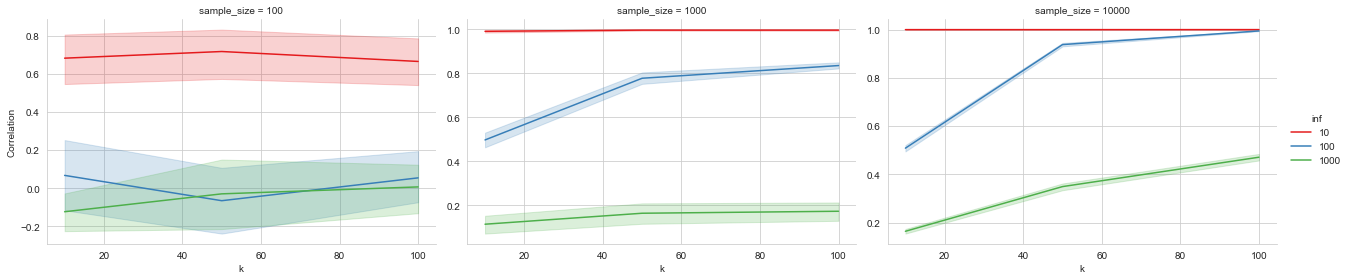

In [17]:
# using seaborn to plot the results, correlation vs number of informative features for different sample sizes for different k values

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('Set1')


g = sns.FacetGrid(collection_df, col='sample_size', col_wrap=3, hue='inf', height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'k', 'Correlation')
g.add_legend()
# plt.grid()
plt.show()

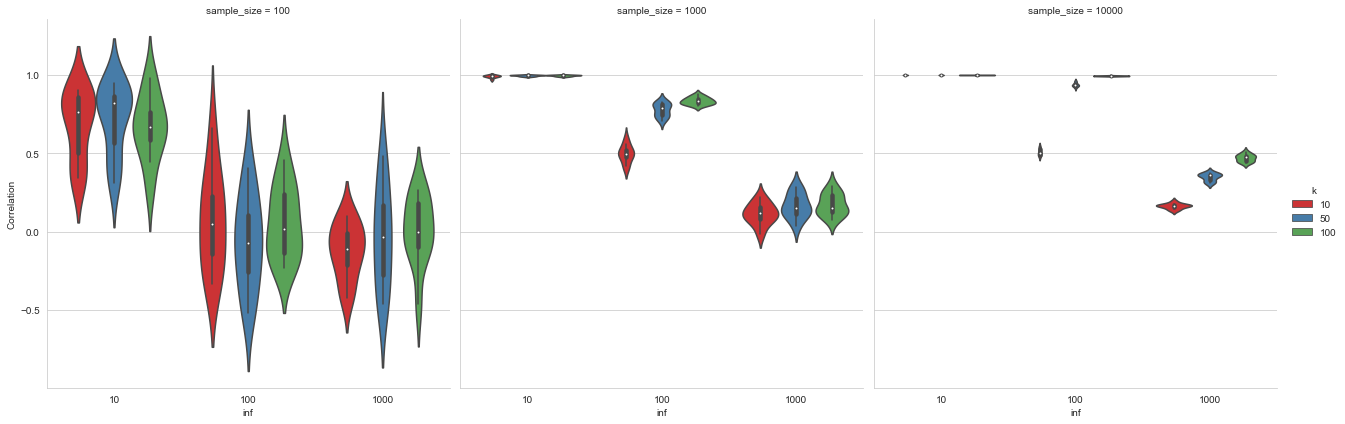

In [30]:
sns.catplot(
    data=collection_df, kind="violin", x="inf", y="Correlation", col="sample_size", hue="k", height=6
)

`inf` represents the number of informative features in the dataset, increasing numbers of informative features should increase the complexity of the problem and thus the decrease in model performance. (This is because the target variable is a linear combination of the informative features, so the more informative features there are, the more complex the problem becomes?) 

Regardless, when sample size is low, it can be seen that the performance of the model decreases as the number of informative features increases. If size of informative features is seen as a measure of complexity, then we can conclude that the model is unable to extract information from the dataset when the sample size is small and the complexity of the problem is high. Performing feature selection on the dataset do not have significant effect on the performance of the model.

However, when the sample size is large, the performance of the model increases drastically. Feature selection appears to be more effective when the complexity of the problem is high. 



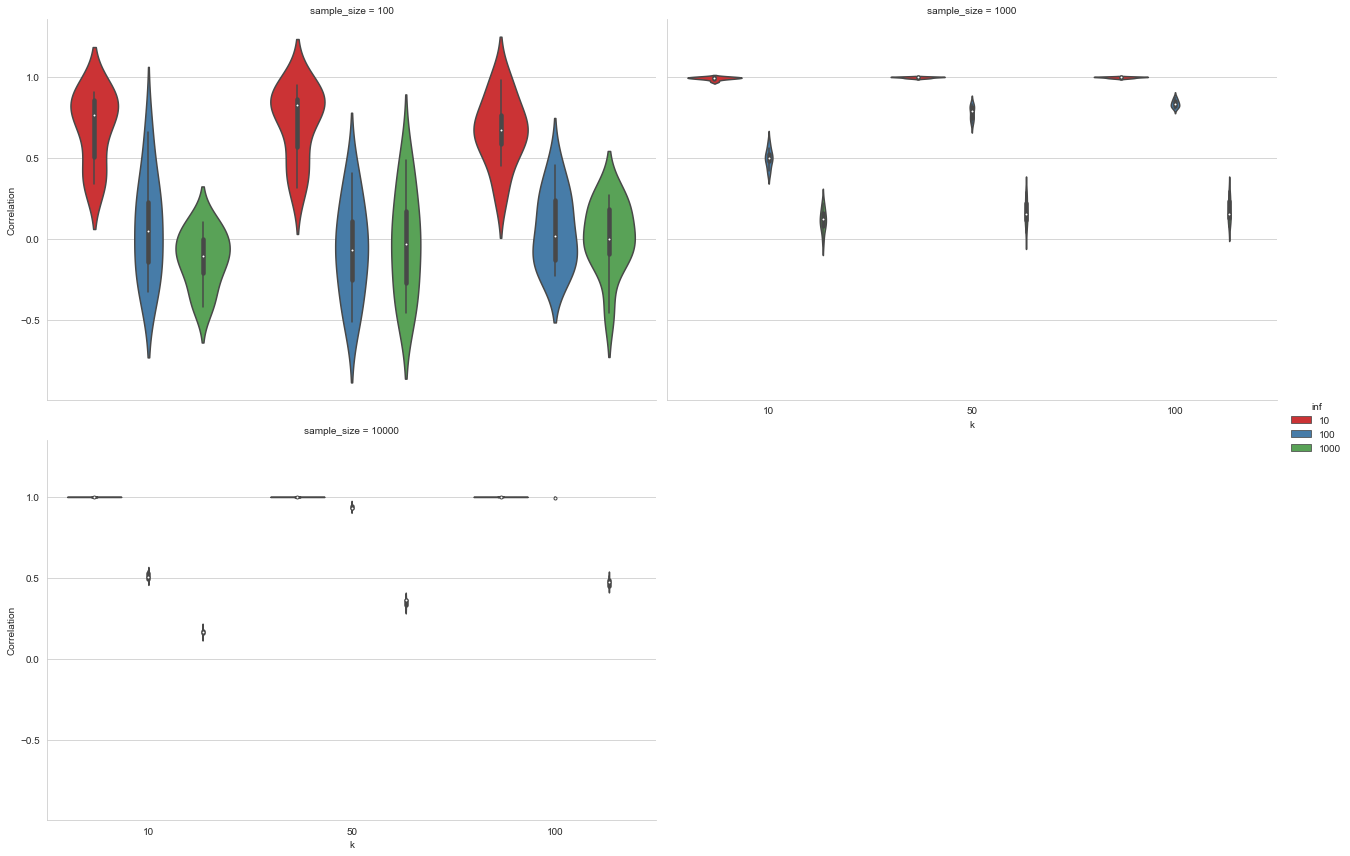

In [25]:
sns.catplot(
    data=collection_df, kind="violin", x="k", y="Correlation", col="sample_size", hue="inf", height=6, aspect=1.5, col_wrap=2
)

## Demonstrating f-regression feature selection is superior to random feature selection

In [53]:
from dynmarker.EvaluationPipeline import EvaluationPipeline
from dynmarker.GeneralPipeline import GeneralPipeline
from dynmarker.FeatureSelection import grand_random_selection, mrmr_select_fcq, greedy_forward_select

# import external libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression


columns = ['exp-id',
           'i', 'k', 'MSE', 'r_squared', 'pearson', 'p-value', 
           'y_test', 'y_pred', 'ground_truth_features', 'selected_features']
collection_df = pd.DataFrame(columns=columns)

# fixed variables
n_samples = 1000
n_features = 10000
n_informative = 100
feature_selected = 100
repeats = 3 # number of repeats for each k value, also controls the random_state for train_test_split

# variables

def run_random(X, y, k, model, split_size=0.1, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state)

    X_train_selected, selected_indices = grand_random_selection(X_train, k=k)
    # perform feature selection, random selection


    model.fit(X_train_selected, y_train)


    X_test_selected = X_test.iloc[:, selected_indices]

    y_pred = model.predict(X_test_selected)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    corr, pval = pearsonr(y_test, y_pred)

    return selected_indices, mse, r2, corr, pval, y_test, y_pred


def run_ground_truth(X, y, model, truth, split_size=0.1, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state)

    X_train_selected = X_train.iloc[:, truth]
    X_test_selected = X_test.iloc[:, truth]

    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    corr, pval = pearsonr(y_test, y_pred)

    return truth, mse, r2, corr, pval, y_test, y_pred


def run_f_regression(X, y, k, model, split_size=0.1, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state)

    # perform feature selection, f_regression
    selected_indices = SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support(indices=True)
    X_train_selected = X_train.iloc[:, selected_indices]

    # fit model
    model.fit(X_train_selected, y_train)

    # evaluate model
    X_test_selected = X_test.iloc[:, selected_indices]
    y_pred = model.predict(X_test_selected)

    # collect metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    corr, pval = pearsonr(y_test, y_pred)

    return selected_indices, mse, r2, corr, pval, y_test, y_pred


def run_mrmr_selection(X, y, k, model, split_size=0.1, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state)

    selected_indices, _ = mrmr_select_fcq(X_train, y_train, K=k)
    X_train_selected = X_train.iloc[:, selected_indices]

    # fit model
    model.fit(X_train_selected, y_train)

    # evaluate model
    X_test_selected = X_test.iloc[:, selected_indices]
    y_pred = model.predict(X_test_selected)

    # collect metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    corr, pval = pearsonr(y_test, y_pred)

    return selected_indices, mse, r2, corr, pval, y_test, y_pred


def run_gffs_selection(X, y, k, model, split_size=0.1, random_state=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state)

    selected_indices, _ = greedy_forward_select(X_train, y_train, K=k)
    X_train_selected = X_train.iloc[:, selected_indices]

    # fit model
    model.fit(X_train_selected, y_train)

    # evaluate model
    X_test_selected = X_test.iloc[:, selected_indices]
    y_pred = model.predict(X_test_selected)

    # collect metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    corr, pval = pearsonr(y_test, y_pred)

    return selected_indices, mse, r2, corr, pval, y_test, y_pred


for i in range(repeats):
    # -- generate dataset -- 

    dataset_random_state = 52

    X, y = make_regression(n_samples=n_samples, 
                           n_features=n_features, 
                           n_informative=n_informative, 
                           random_state=dataset_random_state, shuffle=False)
    # turn X and Y into dataframes
    X_original = pd.DataFrame(X)
    y = pd.Series(y)

    # shuffle columns in X
    X = X_original.sample(frac=1, axis=1, random_state=dataset_random_state)

    # get ground truth features indices, which is the first n_informative columns
    ground_truth_features = list(range(n_informative))

    ground_truth_features_indices = [X.columns.get_loc(c) for c in ground_truth_features if c in X]

    # -- testing of feature selection with different conditions --  

    model = LassoCV(max_iter=10000)

    # - random selection -
    experiment_id = 'random-claim-2'
    selected_indices, mse, r2, corr, pval, y_test, y_pred = run_random(X, y, 
                                                     feature_selected, 
                                                     model, 
                                                     random_state=np.random.randint(1000))
    
    new_df = pd.DataFrame([[experiment_id, 
                            i, 
                            feature_selected, 
                            mse, r2, corr, pval, 
                            y_test, y_pred, 
                            ground_truth_features_indices, 
                            selected_indices]], 
                            columns=columns)
    
    collection_df = pd.concat([collection_df, new_df], ignore_index=True)
    

    # - ground truth -
    experiment_id = 'ground-truth-claim-2'
    selected_indices, mse, r2, corr, pval, y_test, y_pred = run_ground_truth(X, y,
                                                        model,
                                                        ground_truth_features_indices,
                                                        random_state=np.random.randint(1000))
    
    new_df = pd.DataFrame([[experiment_id,
                            i,
                            feature_selected,
                            mse, r2, corr, pval,
                            y_test, y_pred,
                            ground_truth_features_indices,
                            selected_indices]],
                            columns=columns)

    collection_df = pd.concat([collection_df, new_df], ignore_index=True)

    # - f_regression -

    experiment_id = 'f-regression-claim-2'
    selected_indices, mse, r2, corr, pval, y_test, y_pred = run_f_regression(X, y,
                                                        feature_selected,
                                                        model,
                                                        random_state=np.random.randint(1000))
    
    new_df = pd.DataFrame([[experiment_id,
                            i,
                            feature_selected,
                            mse, r2, corr, pval,
                            y_test, y_pred,
                            ground_truth_features_indices,
                            selected_indices]],
                            columns=columns)
    
    collection_df = pd.concat([collection_df, new_df], ignore_index=True)

    # - mrmr -

    # experiment_id = 'mrmr-claim-2'
    # selected_indices, mse, r2, corr, pval, y_test, y_pred = run_mrmr_selection(X, y,
    #                                                     feature_selected,
    #                                                     model,
    #                                                     random_state=np.random.randint(1000))
    
    # new_df = pd.DataFrame([[experiment_id,
    #                         i,
    #                         feature_selected,
    #                         mse, r2, corr, pval,
    #                         y_test, y_pred,
    #                         ground_truth_features_indices,
    #                         selected_indices]],
    #                         columns=columns)
    
    # collection_df = pd.concat([collection_df, new_df], ignore_index=True)

    print(f'--- finished iteration {i}')

    

collection_df.head(10)







--- finished iteration 0
--- finished iteration 1
--- finished iteration 2


,exp-id,i,k,MSE,r_squared,pearson,p-value,y_test,y_pred,ground_truth_features,selected_features
0,random-claim-2,0,100,249383.756276,0.01937,0.172165,0.086745,782 -407.913747 538 -419.679622 166 -23...,"[-63.67906776239879, 60.914551637645836, -18.4...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[99, 1265, 9759, 6091, 9727, 8333, 2280, 5312,..."
1,ground-truth-claim-2,0,100,1.910766,0.999994,0.999999,0.0,960 827.940446 671 44.766473 975 -722...,"[826.5546714261294, 43.24855607969639, -720.00...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538..."
2,f-regression-claim-2,0,100,121984.641569,0.674274,0.825523,0.0,137 234.507881 384 -522.253207 278 886...,"[256.28552752619424, -35.23684969283571, 650.8...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[4, 263, 341, 361, 411, 474, 621, 714, 728, 11..."
3,random-claim-2,1,100,322899.09299,-0.038025,-0.044185,0.662465,434 814.409841 385 -16.299621 93 507...,"[-28.086041030241972, -11.105194083966788, -30...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[119, 568, 5691, 5519, 5723, 5724, 2585, 9032,..."
4,ground-truth-claim-2,1,100,1.82513,0.999993,0.999999,0.0,324 997.080908 887 -432.047702 473 363...,"[996.355776235367, -431.29831866795325, 363.01...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538..."
5,f-regression-claim-2,1,100,107948.004959,0.740639,0.874129,0.0,944 872.342340 681 515.731003 696 -957...,"[370.57302475668723, 663.4513366837075, -689.6...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[4, 341, 357, 361, 411, 509, 621, 714, 728, 10..."
6,random-claim-2,2,100,322780.237325,-0.002319,0.063621,0.52945,131 -202.526969 203 152.249526 50 525...,"[21.723237225741336, 110.83956777055988, 40.31...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[9187, 144, 876, 8016, 5354, 8716, 1473, 4185,..."
7,ground-truth-claim-2,2,100,2.454696,0.999991,0.999999,0.0,696 -957.851145 799 -156.256932 303 ...,"[-955.7632718519214, -154.64116552113245, -18....","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538..."
8,f-regression-claim-2,2,100,129714.811212,0.633157,0.80078,0.0,810 -433.117841 497 1442.534799 409 1...,"[-220.08497446979777, 700.7372615442015, 684.6...","[3955, 3159, 5927, 7721, 4341, 3205, 2814, 538...","[4, 227, 263, 341, 351, 361, 411, 621, 714, 72..."


In [54]:
def get_common_features(collection_df, experiment_id):
    selected_features = collection_df[collection_df['exp-id'] == experiment_id]['selected_features']
    all_common_features = set.intersection(*map(set, selected_features))
    return all_common_features, len(all_common_features)

def get_common_features_between_two(collection_df, experiment_id_1, experiment_id_2):
    selected_features_1 = collection_df[collection_df['exp-id'] == experiment_id_1]['selected_features']
    selected_features_2 = collection_df[collection_df['exp-id'] == experiment_id_2]['selected_features']
    all_common_features = set.intersection(*map(set, selected_features_1), *map(set, selected_features_2))
    return all_common_features, len(all_common_features)

def get_common_features_with_ground_truth(collection_df, experiment_id, ground_truth_features_indices):
    selected_features = collection_df[collection_df['exp-id'] == experiment_id]['selected_features']
    all_common_features = set.intersection(*map(set, selected_features))
    ground_truth_features_intersection = set.intersection(set(ground_truth_features_indices), 
                                                          all_common_features)
    return ground_truth_features_intersection, len(ground_truth_features_intersection)


f_reg_selected_features = collection_df[collection_df['exp-id'] == 'f-regression-claim-2']['selected_features']

all_common_features = set.intersection(*map(set, f_reg_selected_features))
# for f in f_reg_selected_features:
#     print(f)

ground_truth_features_from_f_reg = set.intersection(set(ground_truth_features_indices), all_common_features)

print('Number of common features (f-reg): ', len(all_common_features))
print('Common features: ', all_common_features)

print('Number of common features (f-reg) and ground truth: ', len(ground_truth_features_from_f_reg))
print('Common features f-reg and ground truth: ', ground_truth_features_from_f_reg)

# common features between mrmr and ground truth
# print('Number of common features between mrmr and ground truth: ', get_common_features_with_ground_truth(collection_df, 'mrmr-claim-2', ground_truth_features_indices)[1])

# common features between mrmr and f regression
# print('Number of common features between mrmr and f regression: ', get_common_features_between_two(collection_df, 'mrmr-claim-2', 'f-regression-claim-2')[1])

Number of common features (f-reg):  55
Common features:  {7680, 6403, 4, 5125, 7174, 6404, 5136, 6545, 5656, 4890, 411, 4638, 6305, 9251, 2724, 2856, 7721, 6060, 3374, 4783, 8495, 4147, 1590, 3647, 2625, 1602, 3137, 8387, 6081, 8131, 714, 2772, 341, 7636, 5463, 728, 1880, 3547, 3804, 5341, 7775, 7138, 7011, 4196, 5349, 8038, 7656, 9833, 361, 8684, 621, 1136, 9716, 5757, 4351}
Number of common features (f-reg) and ground truth:  38
Common features f-reg and ground truth:  {6403, 6404, 5125, 7174, 5136, 6545, 5656, 4890, 411, 4638, 6305, 9251, 2724, 2856, 7721, 4783, 8495, 4147, 1590, 3647, 2625, 3137, 6081, 714, 341, 1880, 3547, 5341, 7138, 7011, 4196, 8038, 361, 8684, 621, 1136, 9716, 5757}


In [55]:
def get_mean_std(collection_df, experiment_id, metric):
    metric_values = collection_df[collection_df['exp-id'] == experiment_id][metric]
    mean = np.mean(metric_values)
    std = np.std(metric_values)
    return mean, std

# print('--- mrmr ---')
# print('mean r2: ', get_mean_std(collection_df, 'mrmr-claim-2', 'r_squared')[0])
# print('std r2: ', get_mean_std(collection_df, 'mrmr-claim-2', 'r_squared')[1])

print('--- f-regression ---')
print('mean r2: ', get_mean_std(collection_df, 'f-regression-claim-2', 'r_squared')[0])
print('std r2: ', get_mean_std(collection_df, 'f-regression-claim-2', 'r_squared')[1])


--- f-regression ---
mean r2:  0.6826898335039858
std r2:  0.04428145157139404


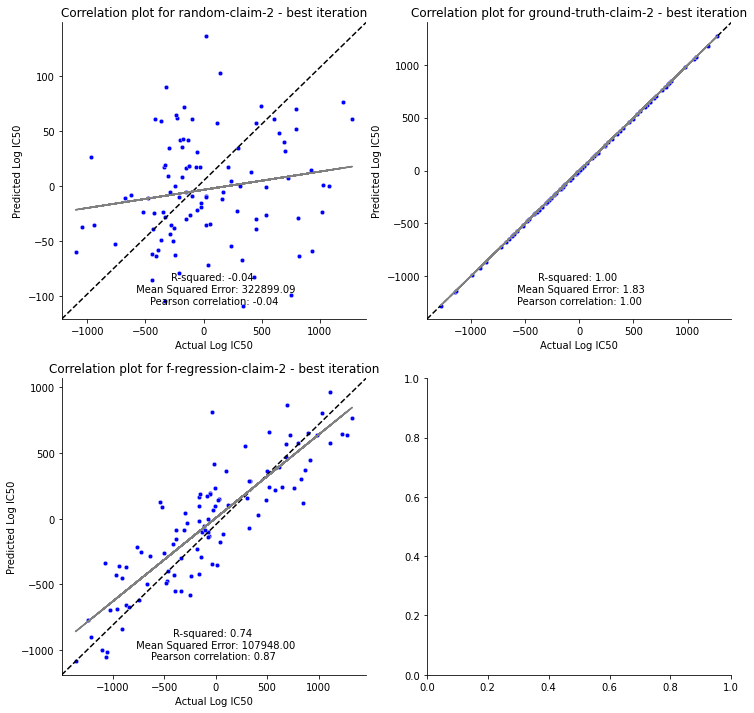

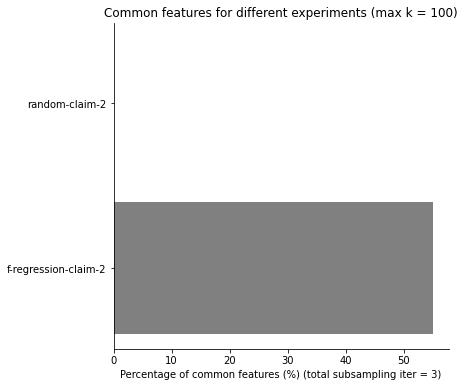

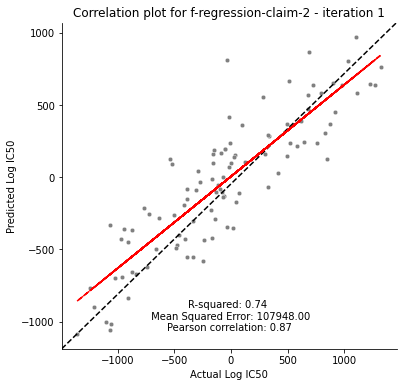

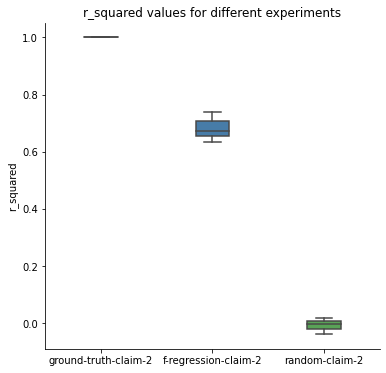

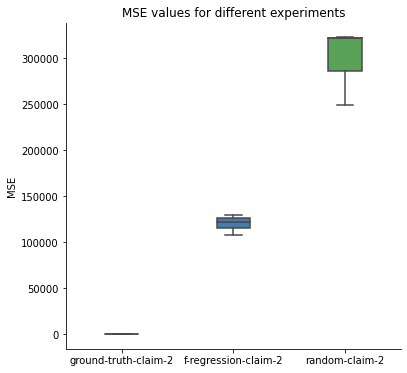

In [56]:
## Plotting results

import matplotlib.pyplot as plt
import seaborn as sns 

def plot_correlation_specific(collection_df, experiment_id, i):
    # extract y_test and y_pred for a specific iteration and experiment id 
    y_test = collection_df[(collection_df['exp-id'] == experiment_id) & (collection_df['i'] == i)]['y_test'].values[0]
    y_pred = collection_df[(collection_df['exp-id'] == experiment_id) & (collection_df['i'] == i)]['y_pred'].values[0]

    # plot correlation with a diagonal line and a line of slope 
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls='--', c='k')
    sns.scatterplot(x=y_test, y=y_pred, s=20, color='grey')
    # line of best fit for the correlation
    z = np.polyfit(y_test, y_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), 'r--')
    plt.xlabel('Actual Log IC50')
    plt.ylabel('Predicted Log IC50')
    # remove top and right spines
    sns.despine()
    # add caption for r_squared and mean squared error
    r_squared = collection_df[(collection_df['exp-id'] == experiment_id) & (collection_df['i'] == i)]['r_squared'].values[0]
    mse = collection_df[(collection_df['exp-id'] == experiment_id) & (collection_df['i'] == i)]['MSE'].values[0]
    corr = collection_df[(collection_df['exp-id'] == experiment_id) & (collection_df['i'] == i)]['pearson'].values[0]
    plt.text(0.5, 0.1, 
             f'R-squared: {r_squared:.2f} \n Mean Squared Error: {mse:.2f}' + '\n' + f'Pearson correlation: {corr:.2f}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             transform=plt.gca().transAxes)
    plt.title(f'Correlation plot for {experiment_id} - iteration {i}')

def plot_correlation_best(collection_df, metric):
    # extract y_test and y_pred for the best iteration for each experiment id
    # best iteration is the one with the highest {metric} value
    y_test = []
    y_pred = []
    for exp_id in collection_df['exp-id'].unique():
        # get all iterations for a specific experiment id
        exp_id_df = collection_df[collection_df['exp-id'] == exp_id]
        # get the iteration with the highest {metric} value
        best_iter = exp_id_df[exp_id_df[metric] == exp_id_df[metric].max()]['i'].values[0]
        # extract y_test and y_pred for the best iteration
        y_test.append(exp_id_df[exp_id_df['i'] == best_iter]['y_test'].values[0])
        y_pred.append(exp_id_df[exp_id_df['i'] == best_iter]['y_pred'].values[0])
        # print debug 
        # print(f'exp_id: {exp_id}, best_iter: {best_iter}, {metric}: {exp_id_df[exp_id_df["i"] == best_iter][metric].values[0]}')
    
    # use matplotlib to plot the correlation with multiple subplots
    # one subplot for each experiment id, calculate the number of rows and columns
    # for the subplots
    n_cols = 2
    n_rows = int(np.ceil(len(collection_df['exp-id'].unique()) / n_cols))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 12))
    # plot correlation with a diagonal line and a line of slope
    for i in range(len(y_test)):
        # get the correct subplot
        row = int(np.floor(i / n_cols))
        col = i % n_cols
        ax = axs[row, col]
        # plot the correlation
        ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='k')
        sns.scatterplot(x=y_test[i], y=y_pred[i], s=20, color='blue', ax=ax)
        # line of best fit for the correlation
        z = np.polyfit(y_test[i], y_pred[i], 1)
        p = np.poly1d(z)
        ax.plot(y_test[i], p(y_test[i]), 'grey')
        ax.set_xlabel('Actual Log IC50')
        ax.set_ylabel('Predicted Log IC50')
        # remove top and right spines
        sns.despine()
        # add caption for r_squared and mean squared error
        r_squared = collection_df[(collection_df['exp-id'] == collection_df['exp-id'].unique()[i]) & (collection_df['i'] == best_iter)]['r_squared'].values[0]
        mse = collection_df[(collection_df['exp-id'] == collection_df['exp-id'].unique()[i]) & (collection_df['i'] == best_iter)]['MSE'].values[0]
        corr = collection_df[(collection_df['exp-id'] == collection_df['exp-id'].unique()[i]) & (collection_df['i'] == best_iter)]['pearson'].values[0]
        ax.text(0.5, 0.1, 
                 f'R-squared: {r_squared:.2f} \n Mean Squared Error: {mse:.2f}' + '\n' + f'Pearson correlation: {corr:.2f}', 
                 horizontalalignment='center', 
                 verticalalignment='center', 
                 transform=ax.transAxes)
        ax.set_title(f'Correlation plot for {collection_df["exp-id"].unique()[i]} - best iteration')
    
    





def plot_metric_compare(collection_df, experiment_ids, metric):
    # extract r_squared values for each experiment id
    r_squared_values = []
    for exp_id in experiment_ids:
        r_squared_values.append(collection_df[collection_df['exp-id'] == exp_id][metric])
    # plot r_squared values
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=r_squared_values, palette='Set1', width=0.3, linewidth=1.5)
    plt.xticks(range(len(experiment_ids)), experiment_ids)
    plt.ylabel(metric)
    plt.title(f'{metric} values for different experiments')
    # remove top and right spines
    sns.despine()

    
def plot_feature_stability_common(collection_df, experiment_ids, max_k, total_iter, plot_perc=True):
    # first, find the common features between each experiment id among all iterations
    common_feature_length = []
    for exp_id in experiment_ids:
        _, length = get_common_features(collection_df, exp_id)
        perc = (length / max_k) * 100
        if plot_perc:
            common_feature_length.append(perc)
        else:
            common_feature_length.append(length)
    
    # plot the common feature length for each experiment id using vertical bar plot 
    # sort by highest common feature length, max_k is the limit 
    plt.figure(figsize=(6, 6))
    plt.barh(range(len(experiment_ids)), common_feature_length, color='grey')
    plt.yticks(range(len(experiment_ids)), experiment_ids)
    plt.xlabel(f'Percentage of common features (%) (total subsampling iter = {total_iter})')
    plt.title(f'Common features for different experiments (max k = {max_k})')
    # remove top and right spines
    sns.despine()

plot_correlation_best(collection_df, 'r_squared')

plot_feature_stability_common(collection_df, ['f-regression-claim-2', 'random-claim-2'], feature_selected, repeats)
        

plot_correlation_specific(collection_df, 'f-regression-claim-2', 1)

plot_metric_compare(collection_df, [ 'ground-truth-claim-2', 'f-regression-claim-2', 'random-claim-2'], 'r_squared')

plot_metric_compare(collection_df, [ 'ground-truth-claim-2', 'f-regression-claim-2', 'random-claim-2'], 'MSE')

Conclusion and further work

what effect does the number of subsampling iterations (i) have on the stability of the feature selection algorithm?
- hypothesis: the more iterations, the less common features are selected

What about the number of features selected (k)? K definitely have an effect on the performance of the model, but how does it affect the stability of the feature selection algorithm?

Variations of k and i for feature selection and therefore biomarker selection requires further investigation.


## Using synthetic dataset to support model selection

Aim: stability of the feature selected across different folds, and model performance across different folds

In [ ]:
# fixed variables 
n_samples = 100 
n_features = 10000
n_informative = 100
feature_selected = 100
repeats = 3

# variables 
k_fold_number = range(3, 11)

# create a list of models to evaluate
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# hyperparameters for the models
max_iter = 10000

models = [LassoCV(max_iter=max_iter), 
          RidgeCV(max_iter=max_iter), 
          ElasticNetCV(max_iter=max_iter), 
          SVR(max_iter=max_iter), 
          KNeighborsRegressor(), 
          RandomForestRegressor(), 
          MLPRegressor()]


# we measure prediction accuracy by pearson correlation and MSE
# we measure stability by checking how much the selected features matches the ground truth